In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Get the DataFrames for all the csv's  

In [ ]:
path = './competitive-data-science-predict-future-sales/'
item_cat    = pd.read_csv(path + 'item_categories.csv')
items       = pd.read_csv(path + 'items.csv')
sales_train = pd.read_csv(path + 'sales_train.csv')
shops       = pd.read_csv(path + 'shops.csv')
test        = pd.read_csv(path + 'test.csv')

In [ ]:
item_cat_cols = item_cat.columns
item_cat_list = pd.unique(item_cat.item_category_name)
sales_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

<AxesSubplot:xlabel='item_id', ylabel='item_cnt_day'>

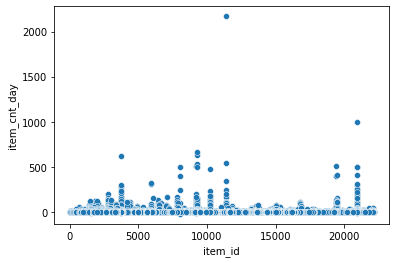

In [ ]:
sns.scatterplot( x=sales_train['item_id'], y=sales_train['item_cnt_day'])

<AxesSubplot:xlabel='item_price', ylabel='item_cnt_day'>

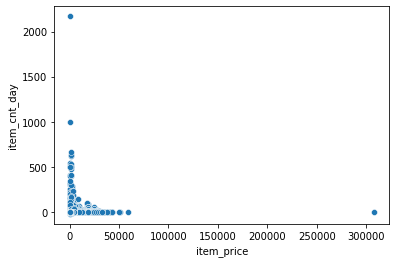

In [ ]:
sns.scatterplot( x=sales_train['item_price'], y=sales_train['item_cnt_day'])

In [ ]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
nums = sales_train.iloc[:,1:].sample(frac=0.1)


In [ ]:
sns.clustermap(nums)

NameError: name 'sns' is not defined

KernelInterrupted: Execution interrupted by the Jupyter kernel.